## Must do


In [1]:
import pandas as pd
import AD_utils
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing train datatset

train_data = pd.read_csv('tests_dataset/Final_train_dataset.csv')
test_data = pd.read_csv('tests_dataset/Final_test_dataset.csv')

smiles_test = test_data['Canonical_SMILES'].to_list()
smiles_train = train_data['Canonical_SMILES'].to_list()
activity = test_data['Activity_outcome'].to_list()
activity_train = train_data['Activity_outcome'].to_list()
train_data

,PUBCHEM_CID,Activity_outcome,Canonical_SMILES
0,49790754,1,CC1=C(C=CC(=C1)OC)C2=C3C=COC3=C(C=C2)C(=O)NCC4...
1,3580213,1,C1=C(C2=C(N=CN=C2N1C3C(C(C(O3)CO)O)O)N)C(=S)N
2,575908,0,C1=CC=C(C=C1)N2C(=NN=N2)SC3=C(C=C(C=C3)[N+](=O...
3,15055241,1,CC1(CC(=CC(=[N+]2CCCCC2)C1)N3CCCCC3)C.[I-]
4,373978,1,C1=C2C(=C(S1)C3C(C(C(O3)CO)O)O)N=CN=C2N
...,...,...,...
1467,42628600,1,CC1C(CC2CC(NC3=NCC1N23)C(C4=CC(=O)NC(=O)N4)O)O...
1468,327045,1,C1CCN(C1)CCN2C(=O)C3=CC=CC4=CC(=CC(=C43)C2=O)[...
1469,1307598,0,C1COCCN1CCNC2=C3C=NN(C3=NC=N2)C4=CC=C(C=C4)Cl
1470,44825859,1,C1C2=CN=NN2C3=CC=CC=C3C(N1CC4=CC(=CC(=C4)Cl)Cl...


In [3]:
from AD_analysis import AD
import pickle

ad = AD(smiles_train)

with open('rfc_pipeline.pkl', 'rb') as file:
   rfc_model = pickle.load(file)

# Functionality check

### Plotting distance with just the smiles_test

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Applicability domain'}, xlabel='Compound ID', ylabel='Tanimoto distance'>,
 None)

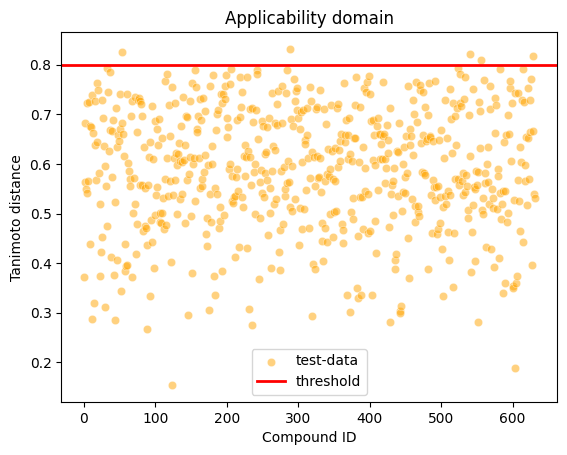

In [4]:
ad.plot_distance(smiles_test, threshold=0.8, k=5)

### Plotting distance with a single input_info

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Applicability domain'}, xlabel='Compound ID', ylabel='Tanimoto distance'>,
 [False])

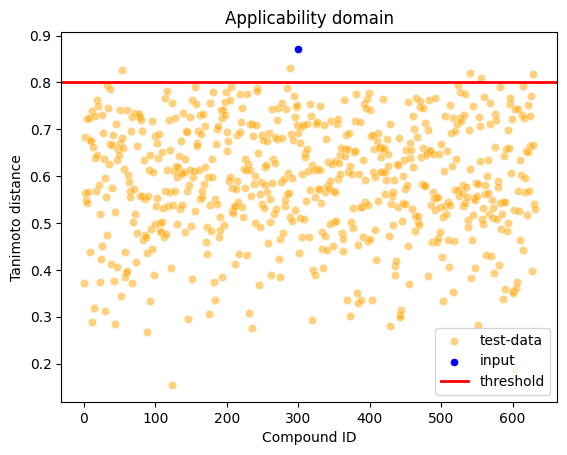

In [5]:
ad.plot_distance(smiles_test, threshold=0.8, k=5, input_info='c1ccccc1')

### Displaying whether a list of molecules is in our outside the domain

In [6]:
input_info = ['c1ccccc1', 'c1ccccc1CC(N)C' ]
_, _, isWithin = ad.plot_distance(smiles_test, threshold=0.8, k=5, input_info=input_info)
plt.close()
print(isWithin)

[False, True]


## Plot of accuracy against various thresholds of test data

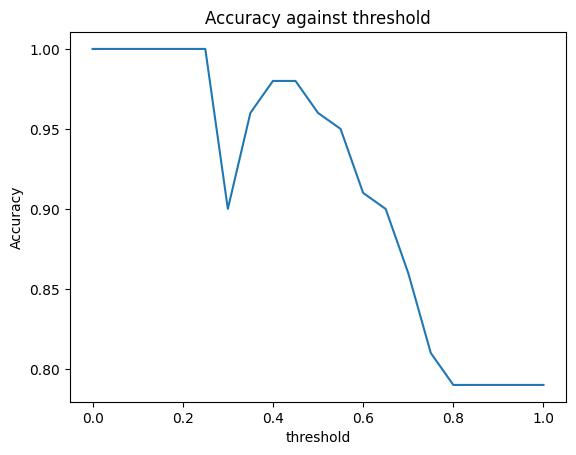

In [4]:
accuracy, threshold = ad.accuracy_v_coverage(smiles_test, activity, rfc_model, k=5, percentage=False)